In [2]:
import numpy as np
import pandas as pd
import os.path as path
import matplotlib.pyplot as plt

In [3]:
def get_shape(name):
    basename = path.basename(name)
    root = path.splitext(path.splitext(basename)[0])[0]
    shape = root.replace('infile', '').split('_')
    return (int(shape[0]),int(shape[1]))

def load(name):
    f = np.fromfile(name, dtype=np.ubyte)
    f = f.reshape(get_shape(name))
    return f


In [4]:
inf = load('./examples/infile1500_1200.bin')
plt.imshow(inf, cmap='plasma')

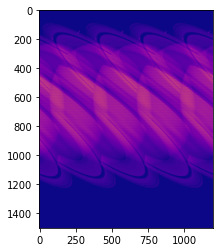

In [5]:
out = load('./examples/infile1500_1200.bin.out')
plt.imshow(out, cmap='plasma')

In [6]:
(np.min(out), np.max(out))

(0, 255)

In [7]:
df = pd.read_csv('./merged.csv').sort_values(['workers', 'time'])

In [8]:
df.head()

workers      length       time
25        2     1800000   0.031198
28        2   180000000   1.998188
27        2   720000000   8.045793
26        2  1620000000  19.690966
29        2  2880000000  52.478827

In [9]:
gbb = df.groupby(['length'])

plt.figure(figsize=(16, 6), dpi=80)
for k in gbb.groups.keys():
    d = df.iloc[gbb.groups[k]].sort_values(['workers', 'time'])

    plt.plot('time', 'workers', '-o', data=d)
    plt.xticks(rotation = 30)
    plt.legend(df['length'].unique())

plt.title('Time of execution')
plt.xlabel('execution time')
plt.ylabel('number of nodes')
plt.show()


In [10]:
gbb = df.query('workers == (64)').groupby(['workers'])

In [19]:
df2 = df.query('workers == (2, 4, 8, 16, 32, 64)').reindex()
gbb = df2.groupby(['length'])
gbb.head(n=2)

workers      length       time
25        2     1800000   0.031198
28        2   180000000   1.998188
27        2   720000000   8.045793
26        2  1620000000  19.690966
29        2  2880000000  52.478827
50        4     1800000   0.030492
53        4   180000000   1.546876
52        4   720000000   5.380349
51        4  1620000000  12.972691
54        4  2880000000  35.032015

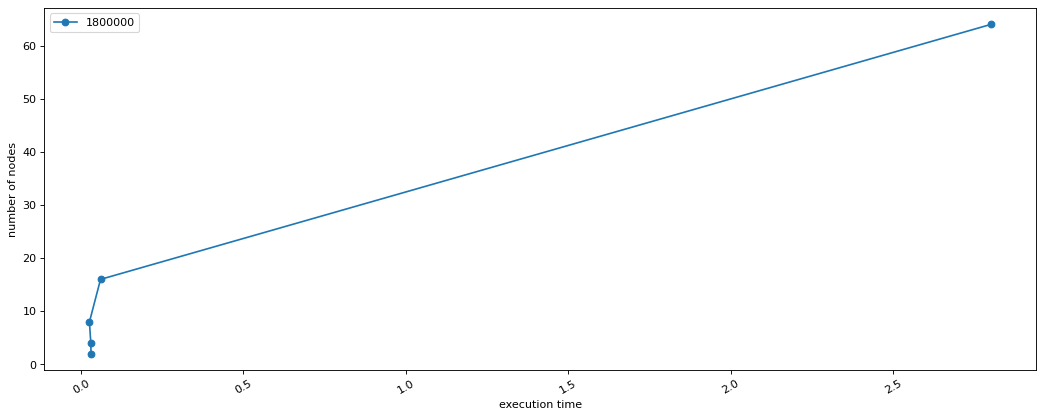

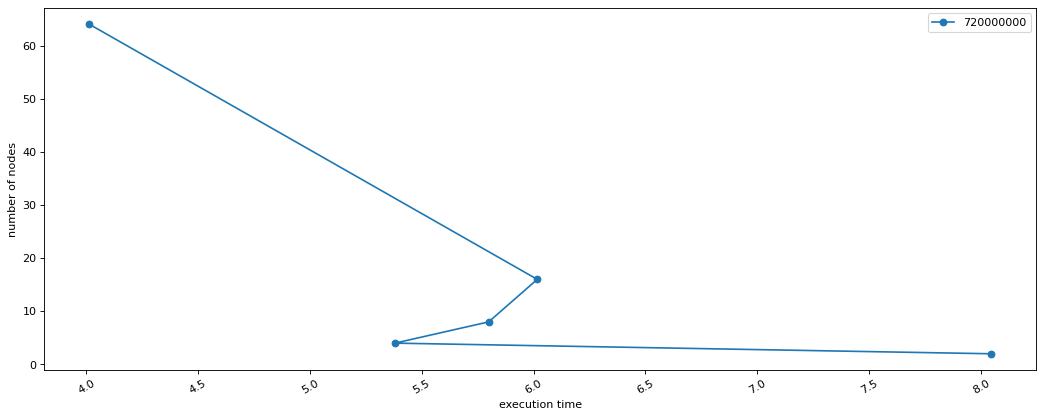

In [27]:
for k in gbb.groups.keys():
    plt.figure(figsize=(16, 6), dpi=80)
    d = df2.loc[gbb.groups[k]].sort_values(['workers', 'time'])
    plt.plot('time', 'workers', '-o', data=d)
    plt.xticks(rotation = 30)
    plt.legend(d['length'].unique())
    plt.xlabel('execution time')
    plt.ylabel('number of nodes')
    plt.show()